In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd
from plotting_module import *

# Load data

In [2]:
datasets = ['activity', 'respondents', 'roster']

column_codes = {}
value_codes = {}
responses = {}

for dataset in datasets:
    with open(f"{dataset:}/value_codes.yaml") as val_codes, open(f"{dataset:}/column_codes.yaml") as col_codes:
        value_codes[dataset] = yaml.safe_load(val_codes)
        column_codes[dataset] = yaml.safe_load(col_codes)
        
responses['activity'] = pd.read_csv("activity/atusact_0321.csv")
responses['respondents'] = pd.read_csv("respondents/atusresp_0321.csv")
responses['roster'] = pd.read_csv("roster/atusrost_0321.csv")

# Roster

Analyse the respondents to see who has responded to the survey

# Gender and age

In [63]:
# Find the people who responded
# TUCASEID identifies the household, TULINENO identifies the person within the household, TERRP explains the relation to the respondent.
# An TERRP of 18 or 19 is the responder themselves.

respondents_self = responses['roster'].loc[responses['roster']['TERRP'].isin([18,19])]
print(f"Number of respondents: {len(respondents_self):}")

Number of respondents: 228455


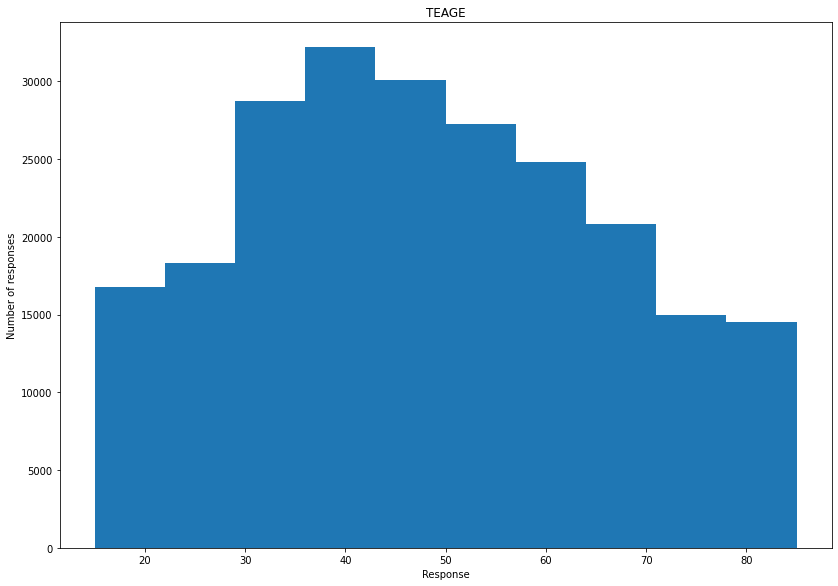

In [61]:
plot_histogram(respondents_self, 'TEAGE', value_codes['roster'])

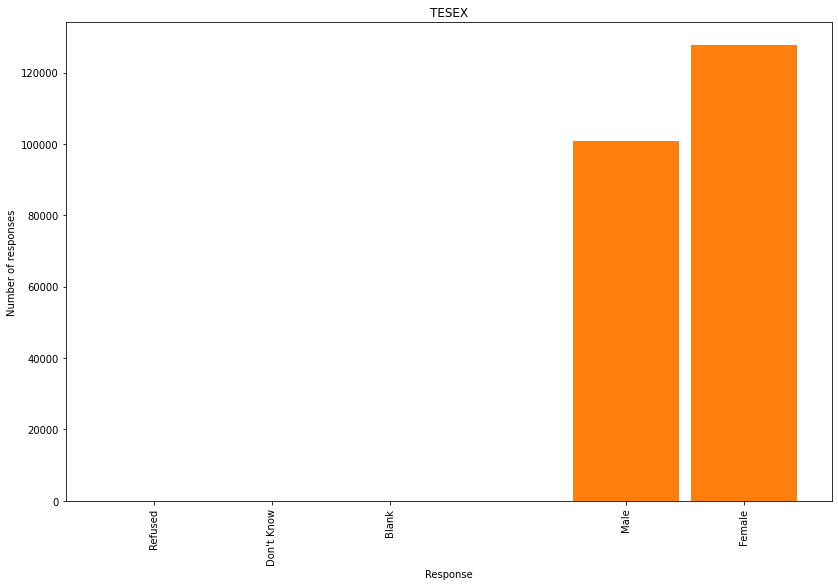

In [5]:
# Plot the sexes of those who actually responded to the survey
plot_histogram(respondents_self, 'TESEX', value_codes['roster'])

There are more women responding than men. Are women predominantly the ones who respond to the survey in a household?

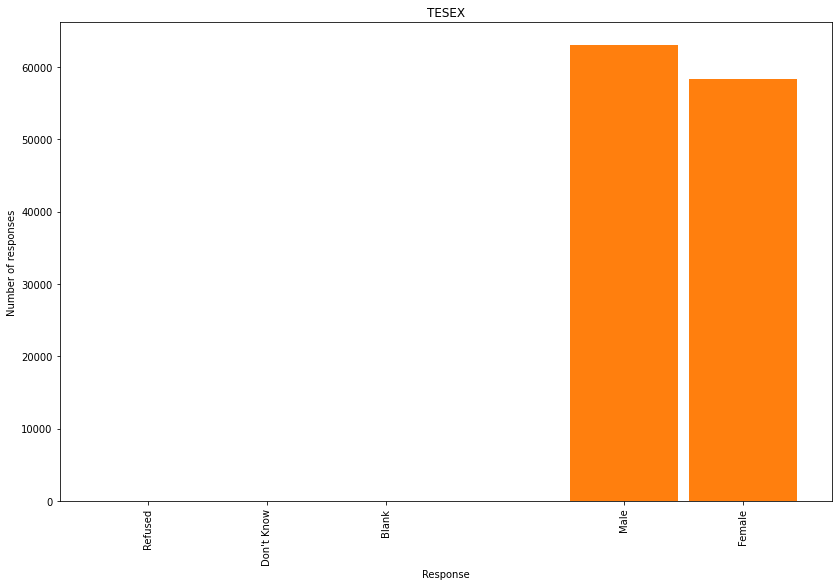

In [6]:
# Analyse the sex of respondents to the survey and their spouse/unmarried partner
search_result = responses['roster'].loc[(responses['roster']['TERRP'].isin([20, 21]))]
plot_histogram(search_result, 'TESEX', value_codes['roster'])

Now include platonic roommates/boarders


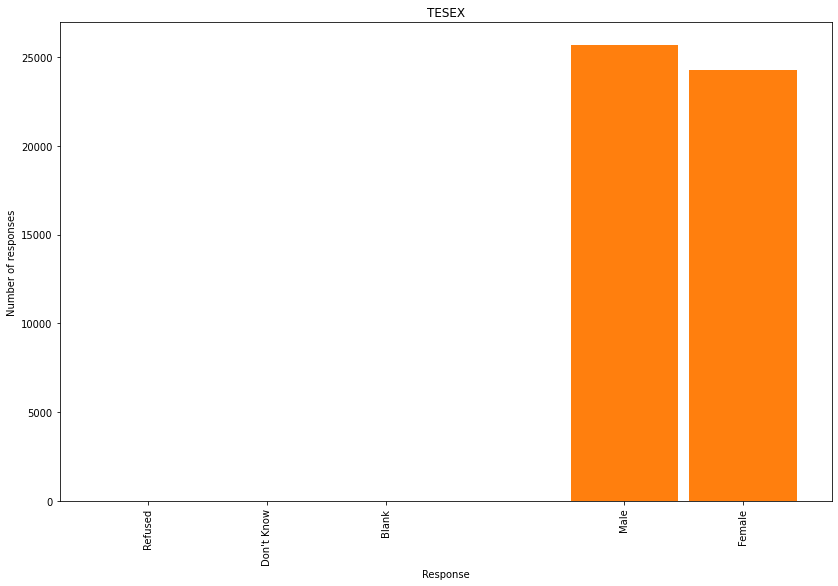

In [7]:
# Analyse the sex of respondents to the survey and their platonic housemates
search_result = responses['roster'].loc[(responses['roster']['TERRP'].isin([25,26,28,29,30]))]
plot_histogram(search_result, 'TESEX', value_codes['roster'])

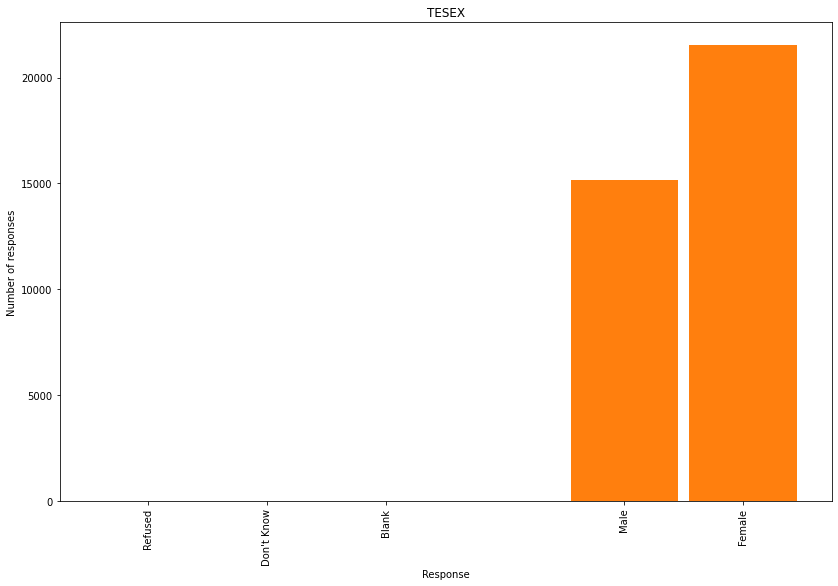

In [8]:
# Analyse the sex of the parents of the respondents to the survey
search_result = responses['roster'].loc[(responses['roster']['TERRP'].isin([24]))]
plot_histogram(search_result, 'TESEX', value_codes['roster'])

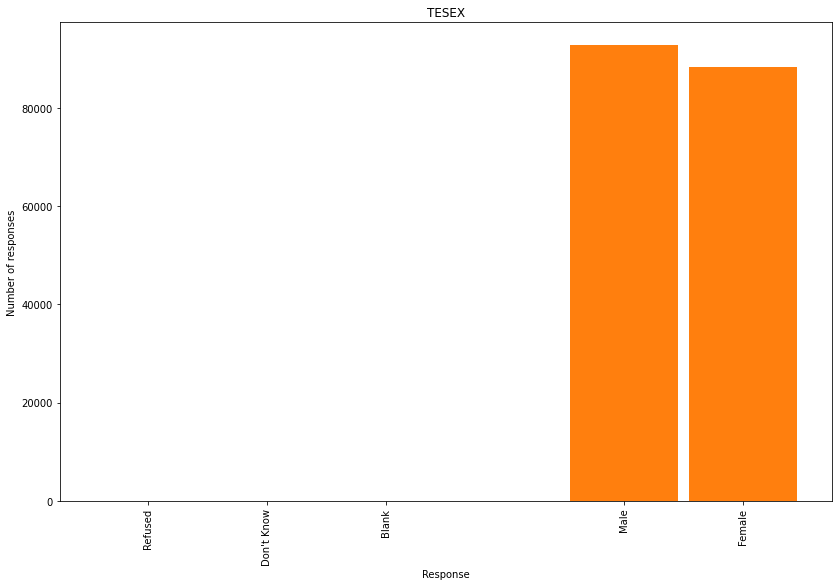

In [9]:
# Sex of the children and grandchildren
search_result = responses['roster'].loc[(responses['roster']['TERRP'].isin([22,27,40]))]
plot_histogram(search_result, 'TESEX', value_codes['roster'])

# What relations exist within the households?

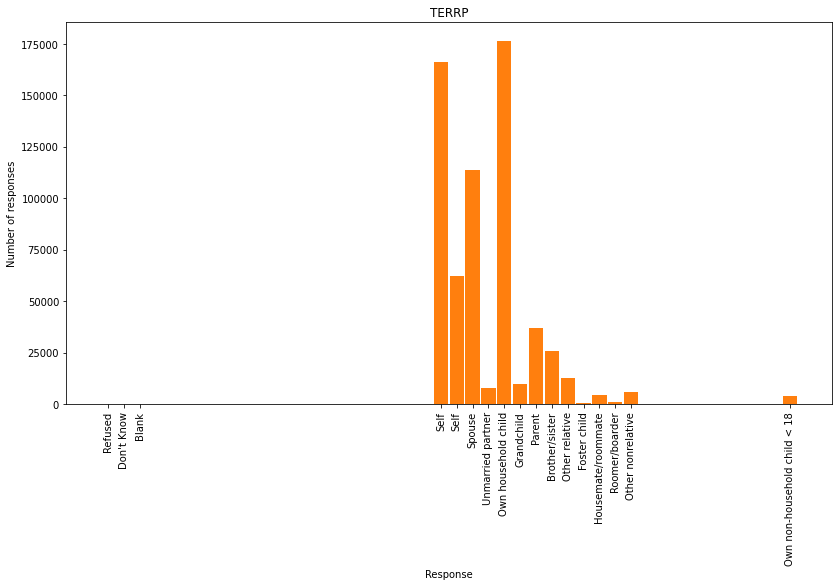

In [11]:
plot_histogram(responses['roster'], 'TERRP', value_codes['roster'])

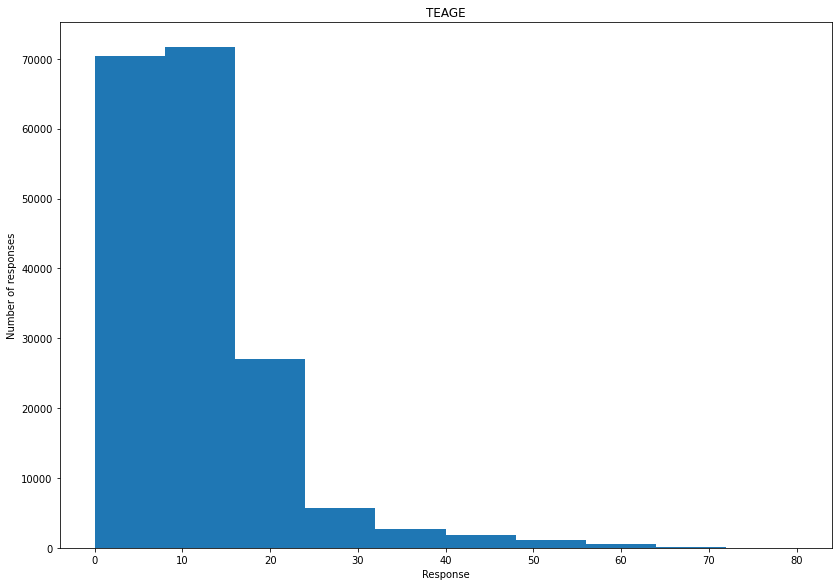

In [14]:
# Plot the age distribution of the children
search_result = responses['roster'].loc[(responses['roster']['TERRP'].isin([22,27,40]))]
plot_histogram(search_result, 'TEAGE', value_codes['roster'])

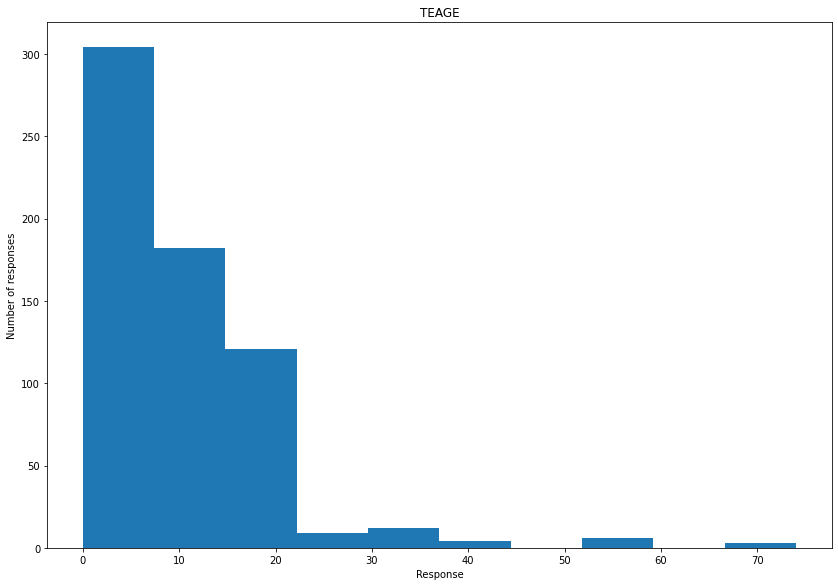

In [18]:
# Plot the age distribution of the foster children
search_result = responses['roster'].loc[(responses['roster']['TERRP'].isin([27]))]
plot_histogram(search_result, 'TEAGE', value_codes['roster'])

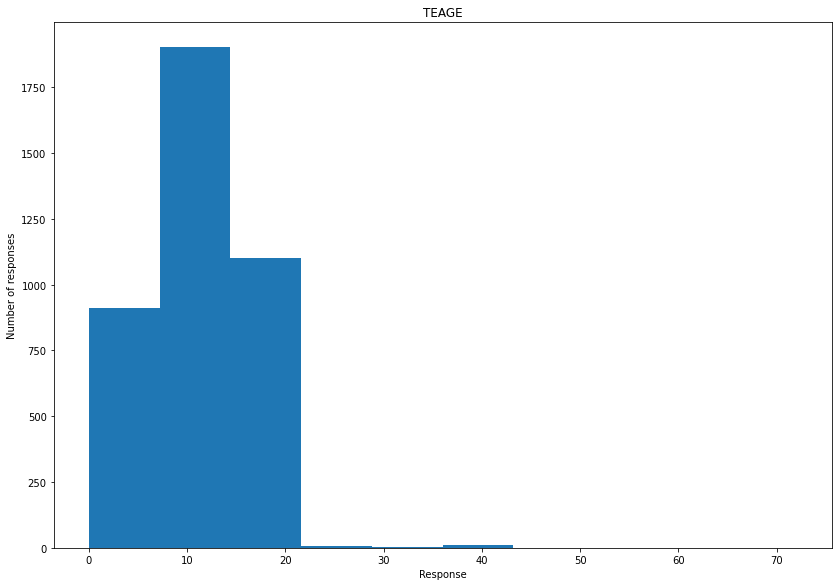

In [19]:
# Plot the age distribution of the non-household children
search_result = responses['roster'].loc[(responses['roster']['TERRP'].isin([40]))]
plot_histogram(search_result, 'TEAGE', value_codes['roster'])

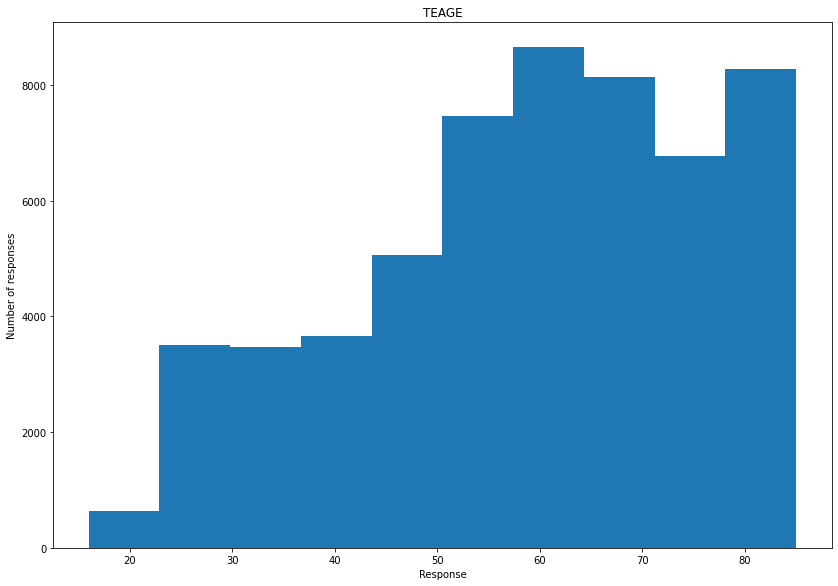

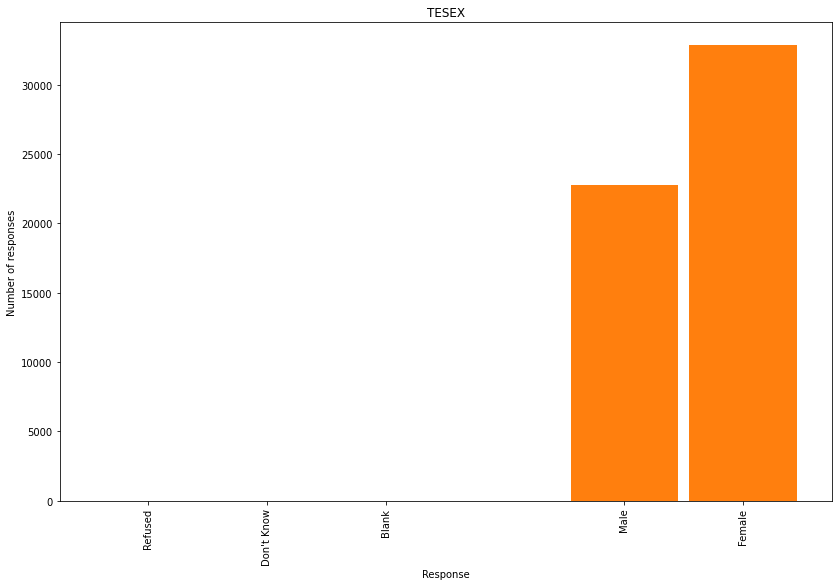

55646 people living alone


In [62]:
# Find the number of people who live alone. Only one TUCASEID in the roster dataset
living_alone = responses['roster'].mask(responses['roster']['TUCASEID'].duplicated(keep=False)).dropna()
plot_histogram(living_alone, 'TEAGE', value_codes['roster'])
plot_histogram(living_alone, 'TESEX', value_codes['roster'])
print(f"{len(living_alone):} people living alone")